In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    ConfusionMatrixDisplay, confusion_matrix, accuracy_score, 
    precision_score, recall_score, PrecisionRecallDisplay, RocCurveDisplay
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
df = pd.read_csv('emails.csv')
df.head()

Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]

In [ ]:
print("Null values per column:\n", df.isnull().sum())
df.dropna(how='any', inplace=True)

Null values per column:
 Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64


In [ ]:
x = df.iloc[:, 1:-1].values  
y = df.iloc[:, -1].values    

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)


In [40]:
def report(classifier, x_test, y_test):
    y_pred = classifier.predict(x_test)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
    display.plot()
    plt.title(f'Confusion Matrix for {classifier.__class__.__name__}')
    plt.show()

    # Accuracy, Precision, and Recall
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision Score: {precision_score(y_test, y_pred, average='binary'):.2f}")
    print(f"Recall Score: {recall_score(y_test, y_pred, average='binary'):.2f}")

    # Plot Precision-Recall curve
    PrecisionRecallDisplay.from_estimator(classifier, x_test, y_test)
    plt.title(f'Precision-Recall Curve for {classifier.__class__.__name__}')
    plt.show()

    # Plot ROC curve
    RocCurveDisplay.from_estimator(classifier, x_test, y_test)
    plt.title(f'ROC Curve for {classifier.__class__.__name__}')
    plt.show()


K-Nearest Neighbors (KNN) Classifier Report:


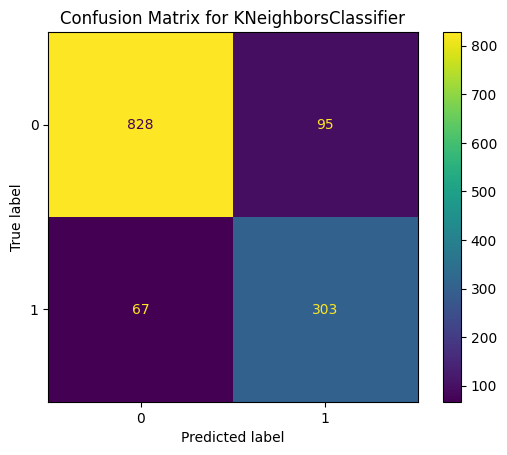

Accuracy: 0.87
Precision Score: 0.76
Recall Score: 0.82


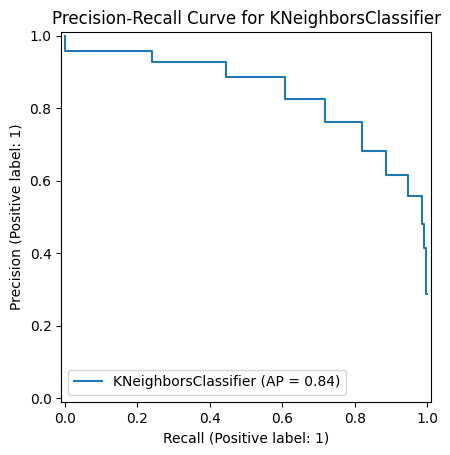

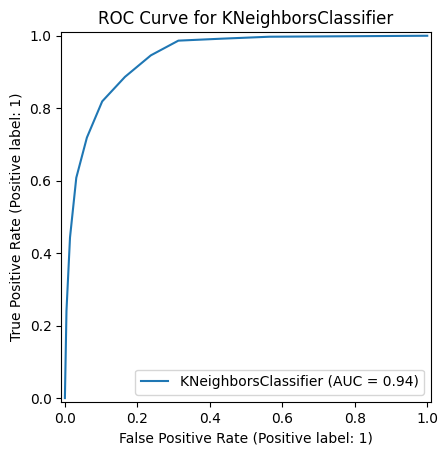

In [41]:
kNN = KNeighborsClassifier(n_neighbors=10)
kNN.fit(x_train, y_train)
print("\nK-Nearest Neighbors (KNN) Classifier Report:")
report(kNN, x_test, y_test)


Support Vector Machine (SVM) Classifier Report:


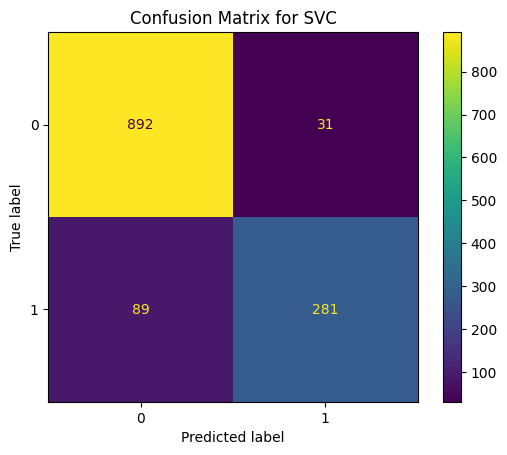

Accuracy: 0.91
Precision Score: 0.90
Recall Score: 0.76


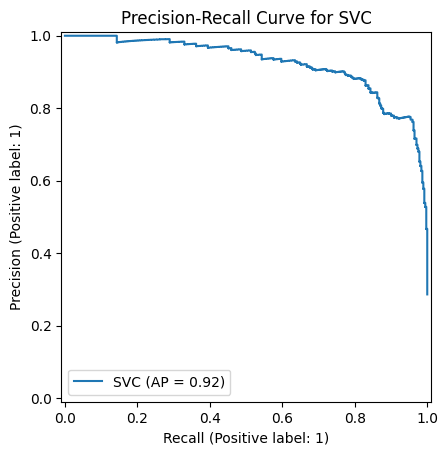

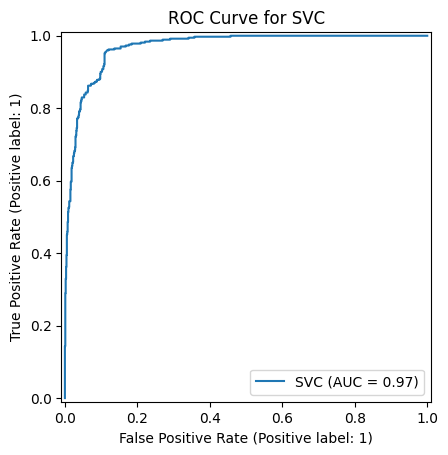

In [42]:
svm = SVC(gamma='auto', random_state=10)
svm.fit(x_train, y_train)
print("\nSupport Vector Machine (SVM) Classifier Report:")
report(svm, x_test, y_test)